## Ingestion

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/real_estate_ml/master/data/Zip_Zhvi_SingleFamilyResidence_2018.csv")
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,15508.000,15508.000,15508.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,...,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000
mean,80789.618,47683.566,7754.500,115889.866,116007.379,116123.051,116235.493,116358.920,116501.681,116689.315,...,279359.582,280672.685,282148.749,283446.447,284466.282,285500.200,286717.307,288029.320,289187.510,290106.635
std,31521.485,29008.034,4476.918,85115.825,85264.209,85413.118,85566.676,85744.243,85958.867,86230.630,...,361868.364,361360.576,363102.089,365301.815,366277.876,367095.613,366772.521,364624.171,361143.146,359132.687
min,58196.000,1001.000,1.000,11300.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,...,21700.000,21700.000,22100.000,22200.000,22000.000,21800.000,21700.000,21500.000,21600.000,21900.000
25%,67215.000,22199.000,3877.750,66700.000,66800.000,66925.000,67100.000,67200.000,67300.000,67500.000,...,128300.000,128800.000,129675.000,130300.000,131100.000,131900.000,132900.000,134000.000,135100.000,135600.000
50%,77886.500,45792.500,7754.500,96500.000,96700.000,96750.000,96900.000,96900.000,97000.000,97150.000,...,191100.000,192150.000,193400.000,194600.000,195700.000,196900.000,198100.000,199600.000,201100.000,202150.000
75%,90314.250,74010.250,11631.250,140500.000,140600.000,140600.000,140800.000,141000.000,141100.000,141300.000,...,310750.000,312300.000,314325.000,316100.000,317425.000,318325.000,319800.000,321200.000,322425.000,323900.000
max,753844.000,99901.000,15508.000,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,...,17724700.000,17408900.000,17450500.000,17722800.000,18006700.000,18273800.000,18331900.000,18131900.000,17594900.000,17119600.000


## EDA

In [0]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.000,335400.000,336500.000,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.000,212200.000,212200.000,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.000,500900.000,503100.000,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.000,77300.000,77300.000,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.000,95600.000,95800.000,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [0]:
columns_to_drop = ['RegionID', 'ZipCode', 'SizeRank', 'Metro', 'CountyName']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [0]:
df_numerical.describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,...,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000
mean,119843.979,119964.886,120083.967,120200.023,120327.735,120475.887,120670.394,120896.748,121239.875,121680.979,...,296637.596,298087.355,299639.037,300985.220,302016.350,303017.074,304232.096,305623.276,306889.113,307909.642
std,86787.386,86943.535,87100.133,87261.531,87447.615,87671.976,87955.472,88287.690,88726.163,89229.016,...,324511.156,325590.838,326899.476,327797.537,327909.039,327991.275,328048.196,327854.154,327338.204,327477.529
min,11400.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,12200.000,12300.000,12500.000,...,21700.000,21700.000,22100.000,22600.000,23100.000,23700.000,24300.000,24400.000,24400.000,24600.000
25%,70000.000,70100.000,70300.000,70400.000,70600.000,70800.000,71000.000,71200.000,71400.000,71700.000,...,139100.000,139900.000,140725.000,141625.000,142600.000,143300.000,144225.000,145600.000,146700.000,147400.000
50%,100750.000,100800.000,100800.000,101000.000,101000.000,101100.000,101200.000,101300.000,101400.000,101800.000,...,208200.000,209700.000,211050.000,212700.000,213950.000,214900.000,216250.000,217800.000,219100.000,220000.000
75%,144500.000,144600.000,144700.000,144800.000,144900.000,144975.000,145200.000,145500.000,145900.000,146200.000,...,336300.000,337975.000,339900.000,341100.000,342000.000,342975.000,344275.000,345800.000,347750.000,348975.000
max,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,3888900.000,3928800.000,3964600.000,...,7494200.000,7529400.000,7534400.000,7494600.000,7417200.000,7395700.000,7265400.000,6917500.000,6692700.000,6671700.000


In [0]:
df_numerical.head(10)

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,Chicago,IL,334200.000,335400.000,336500.000,337600.000,338500.000,339500.000,340400.000,341300.000,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,Katy,TX,210400.000,212200.000,212200.000,210700.000,208300.000,205500.000,202500.000,199800.000,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,Chicago,IL,498100.000,500900.000,503100.000,504600.000,505500.000,505700.000,505300.000,504200.000,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,El Paso,TX,77300.000,77300.000,77300.000,77300.000,77400.000,77500.000,77600.000,77700.000,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,Katy,TX,95400.000,95600.000,95800.000,96100.000,96400.000,96700.000,96800.000,96800.000,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700
5,Houston,TX,95000.000,95200.000,95400.000,95700.000,95900.000,96100.000,96200.000,96100.000,...,163600,164800,165500,166200,167300,168600,169500,170700,172300,173600
6,New York,NY,152900.000,152700.000,152600.000,152400.000,152300.000,152000.000,151800.000,151600.000,...,416600,420400,422800,425900,430100,433700,434500,435500,439100,443100
7,Chicago,IL,216500.000,216700.000,216900.000,217000.000,217100.000,217200.000,217500.000,217900.000,...,785100,787700,788500,778400,763500,758400,756500,749000,744600,749200
8,New York,NY,162000.000,162300.000,162600.000,163000.000,163400.000,164000.000,164700.000,165700.000,...,942500,969000,995600,1024700,1059600,1090700,1111800,1122700,1114600,1100500
9,San Francisco,CA,766000.000,771100.000,776500.000,781900.000,787300.000,793000.000,799100.000,805800.000,...,3761200,3810600,3876700,3942300,3982900,3993000,3999000,4014600,4009500,4016600


In [0]:
df_numerical = df_numerical[df_numerical.State == 'CA']
df_numerical.head(10)

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
9,San Francisco,CA,766000.000,771100.000,776500.000,781900.000,787300.000,793000.000,799100.000,805800.000,...,3761200,3810600,3876700,3942300,3982900,3993000,3999000,4014600,4009500,4016600
16,Hawthorne,CA,152500.000,152600.000,152600.000,152600.000,152600.000,152600.000,152600.000,152700.000,...,611600,614200,617300,621000,625700,631100,636600,642800,648400,652100
29,Pittsburg,CA,139200.000,138300.000,137500.000,136600.000,135600.000,134700.000,133800.000,133100.000,...,417700,421600,425900,429100,430200,429400,429400,428600,426100,423700
32,Los Angeles,CA,340600.000,341700.000,343000.000,344400.000,346100.000,348000.000,350300.000,353000.000,...,1932400,1935400,1941500,1948700,1938000,1916500,1899600,1894800,1892600,1893500
70,Alameda,CA,222400.000,222300.000,222400.000,222600.000,223000.000,223600.000,224500.000,225700.000,...,1039900,1042000,1038100,1030700,1023200,1015500,1010400,1013200,1020000,1027600
79,San Francisco,CA,213900.000,214800.000,216000.000,217500.000,219200.000,221200.000,223700.000,226500.000,...,1566500,1592600,1625200,1645500,1651200,1653600,1656100,1654100,1643000,1637100
81,Los Angeles,CA,231300.000,231700.000,232100.000,232400.000,232800.000,233200.000,233800.000,234700.000,...,1409200,1417600,1422100,1423900,1424600,1428400,1432300,1432200,1419600,1407400
92,Los Angeles,CA,119500.000,119500.000,119400.000,119300.000,119200.000,119100.000,119100.000,119200.000,...,416300,418200,419200,419800,420700,422600,424900,426700,427700,428500
93,Folsom,CA,190000.000,189300.000,188500.000,187800.000,187300.000,186800.000,186500.000,186300.000,...,542400,542200,544300,548700,553500,556100,556200,556600,558300,560400
94,Long Beach,CA,128300.000,128100.000,127800.000,127500.000,127100.000,126800.000,126600.000,126400.000,...,453700,455000,456400,457700,458900,459700,460900,463200,465000,465900


In [0]:
a = ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach', 'Oakland', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 
'Stockton', 'Chula Vista', 'Irvine', 'Fremont', 'San Bernardino', 'Modesto', 'Fontana', 'Oxnard','Moreno Valley','Huntington Beach','Glendale', 'Santa Clarita']
df_numerical = df_numerical[df_numerical['City'].isin (a)]
df_numerical.head()

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
9,San Francisco,CA,766000.000,771100.000,776500.000,781900.000,787300.000,793000.000,799100.000,805800.000,...,3761200,3810600,3876700,3942300,3982900,3993000,3999000,4014600,4009500,4016600
32,Los Angeles,CA,340600.000,341700.000,343000.000,344400.000,346100.000,348000.000,350300.000,353000.000,...,1932400,1935400,1941500,1948700,1938000,1916500,1899600,1894800,1892600,1893500
79,San Francisco,CA,213900.000,214800.000,216000.000,217500.000,219200.000,221200.000,223700.000,226500.000,...,1566500,1592600,1625200,1645500,1651200,1653600,1656100,1654100,1643000,1637100
81,Los Angeles,CA,231300.000,231700.000,232100.000,232400.000,232800.000,233200.000,233800.000,234700.000,...,1409200,1417600,1422100,1423900,1424600,1428400,1432300,1432200,1419600,1407400
92,Los Angeles,CA,119500.000,119500.000,119400.000,119300.000,119200.000,119100.000,119100.000,119200.000,...,416300,418200,419200,419800,420700,422600,424900,426700,427700,428500


In [0]:
df_numerical = df_numerical.groupby(['City']).median()
df_numerical.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
City,,,,,,,,,,,,,,,,,,,,,
Anaheim,159700.000,159400.000,159200.000,159000.000,158900.000,158800.000,158900.000,159100.000,159500.000,160100.000,...,584200,586700,589800,592800,595400,597600,597800,597500,598400,600600
Bakersfield,92600.000,92250.000,91900.000,91550.000,91200.000,90850.000,90700.000,90600.000,90600.000,90750.000,...,200600,201550,202800,203750,204300,205000,205900,207050,208450,209450
Chula Vista,209900.000,209700.000,209700.000,209900.000,210300.000,211000.000,211900.000,213000.000,214300.000,215600.000,...,614700,614900,614300,613200,612600,613700,614100,614000,614200,614700
Fontana,118100.000,117600.000,117100.000,116500.000,115900.000,115500.000,115100.000,114900.000,114800.000,114900.000,...,366700,367900,370600,373800,376600,378100,378800,379500,380700,381800
Fremont,216000.000,216050.000,216250.000,216500.000,216900.000,217500.000,218350.000,219400.000,220850.000,222600.000,...,1058300,1068300,1082500,1096850,1105750,1114150,1127750,1143800,1152800,1157000


In [0]:
df_tr = df_numerical.transpose()
df_tr.head(10)

City,Anaheim,Bakersfield,Chula Vista,Fontana,Fremont,Fresno,Glendale,Huntington Beach,Irvine,Long Beach,...,Oxnard,Riverside,Sacramento,San Bernardino,San Diego,San Francisco,San Jose,Santa Ana,Santa Clarita,Stockton
1996-04,159700.000,92600.000,209900.000,118100.000,216000.000,97200.000,225700.000,255700.000,279150.000,136500.000,...,177200.000,115250.000,109450.000,79500.000,168250.000,306900.000,234600.000,144400.000,216300.000,105200.000
1996-05,159400.000,92250.000,209700.000,117600.000,216050.000,97150.000,226100.000,256000.000,278450.000,136300.000,...,177050.000,114800.000,109150.000,79400.000,168000.000,307600.000,235100.000,144400.000,215950.000,104800.000
1996-06,159200.000,91900.000,209700.000,117100.000,216250.000,97000.000,226400.000,256350.000,277850.000,136000.000,...,176900.000,114350.000,108750.000,79300.000,167750.000,308400.000,235900.000,144300.000,215550.000,104300.000
1996-07,159000.000,91550.000,209900.000,116500.000,216500.000,96900.000,226700.000,256850.000,277300.000,135800.000,...,176750.000,113900.000,108400.000,79200.000,167500.000,309300.000,237300.000,144200.000,215100.000,103750.000
1996-08,158900.000,91200.000,210300.000,115900.000,216900.000,96800.000,227100.000,257550.000,276900.000,135600.000,...,176600.000,113450.000,108100.000,79100.000,167350.000,310500.000,238800.000,144200.000,214650.000,103200.000
1996-09,158800.000,90850.000,211000.000,115500.000,217500.000,96800.000,227600.000,258450.000,276600.000,135400.000,...,176400.000,113050.000,107800.000,79000.000,167200.000,312000.000,240400.000,144100.000,214300.000,102650.000
1996-10,158900.000,90700.000,211900.000,115100.000,218350.000,96800.000,228200.000,259500.000,276550.000,135500.000,...,176250.000,112800.000,107600.000,79000.000,167300.000,313700.000,241600.000,144200.000,214200.000,102100.000
1996-11,159100.000,90600.000,213000.000,114900.000,219400.000,96750.000,228900.000,260700.000,276700.000,135600.000,...,176100.000,112650.000,107400.000,79000.000,167450.000,315600.000,243200.000,144300.000,214350.000,101700.000
1996-12,159500.000,90600.000,214300.000,114800.000,220850.000,96850.000,229900.000,262250.000,277200.000,135900.000,...,176100.000,112700.000,107400.000,79100.000,167950.000,318100.000,245300.000,144600.000,214900.000,101450.000
1997-01,160100.000,90750.000,215600.000,114900.000,222600.000,96950.000,231000.000,263850.000,277900.000,136400.000,...,176250.000,112850.000,107400.000,79300.000,168700.000,321000.000,247700.000,145100.000,215900.000,101300.000


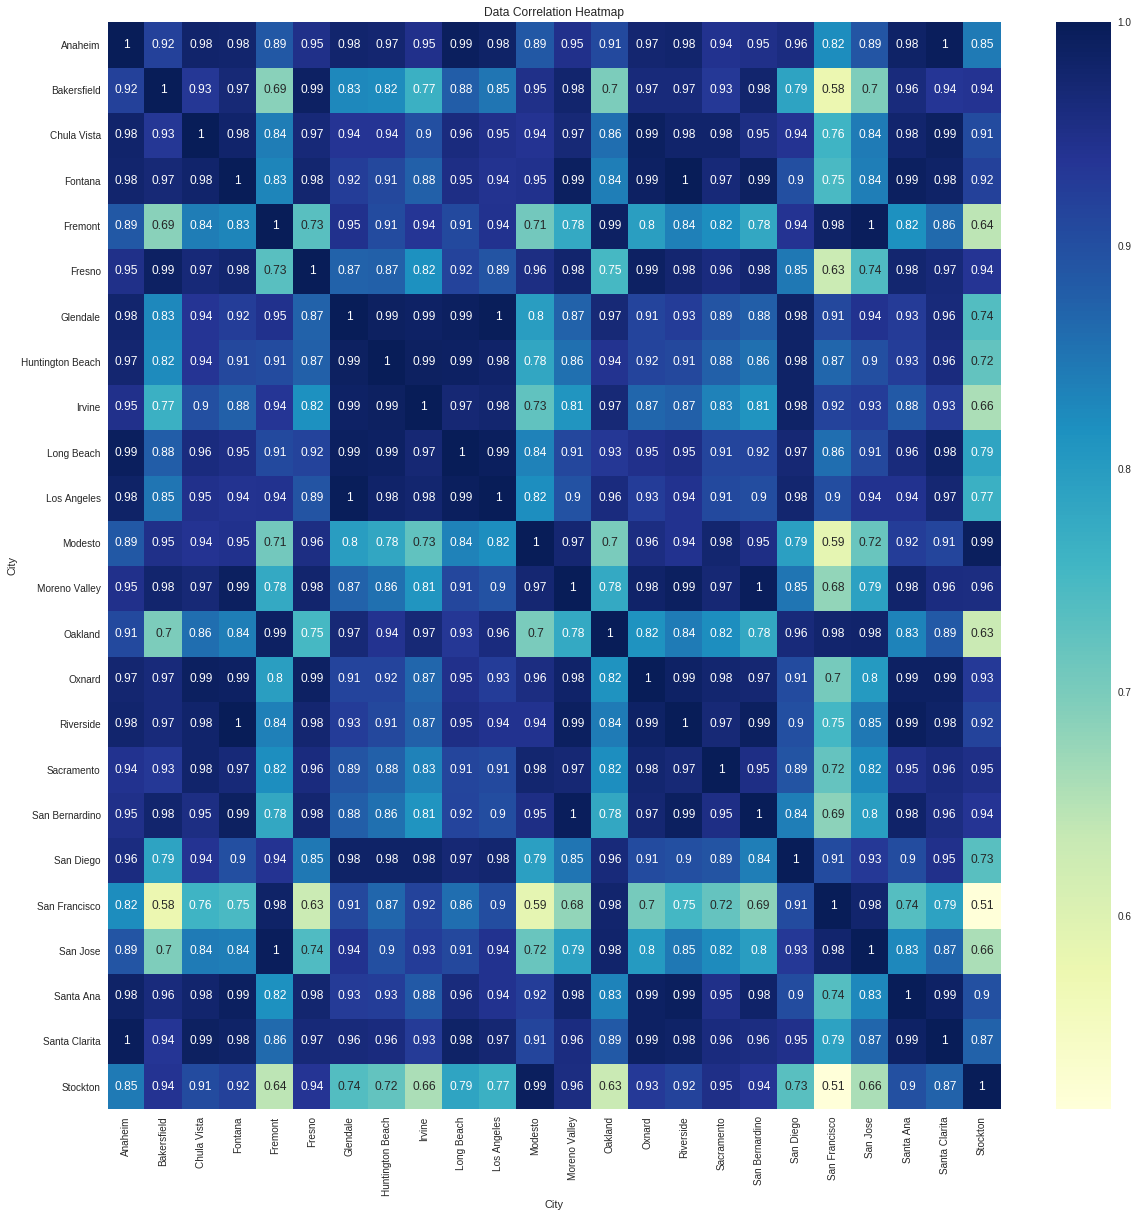

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,20))
ax = plt.axes()
ax.set_title("Data Correlation Heatmap")
corr = df_tr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = "YlGnBu",
            annot = True)

##Data modeling

In [0]:
#Now seperate the dataset as response variable and feature variabes
X = df_tr.drop('San Francisco', axis = 1)
y = df_tr['San Francisco']

In [0]:

X_train, X_test = X[1:len(X)-24], X[len(X)-24:]
y_train, y_test = y[1:len(X)-24], y[len(X)-24:]

In [0]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Prices')

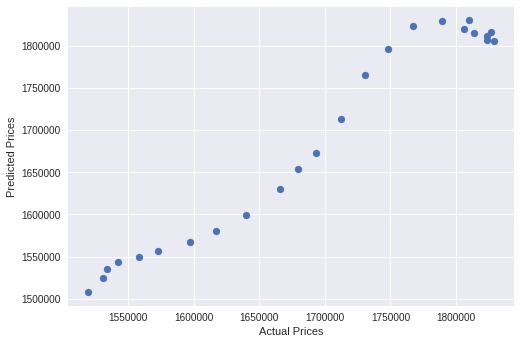

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [0]:
model.score(X_test, y_test)

0.9416076864882728

##Conclusion
For the machine learning model, the 24 largest cities in California show a high correlation with San Francisco home prices, and thus I get a high accuracy in this prediction.